<a href="https://colab.research.google.com/github/chandureddy23/AI-first-Large-project/blob/main/Heart_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df.shape

(5110, 12)

In [17]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [18]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [20]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
df['bmi'].mean()

28.893236911794666

In [22]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [23]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [24]:
# Visualization of Categorical Columns
Cat_columns = df.select_dtypes(exclude=np.number).columns
Cat_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

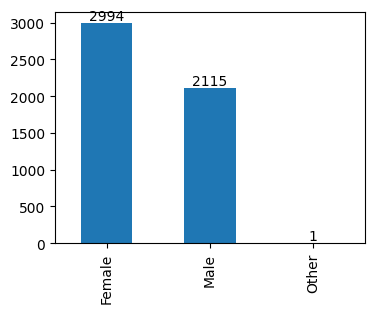

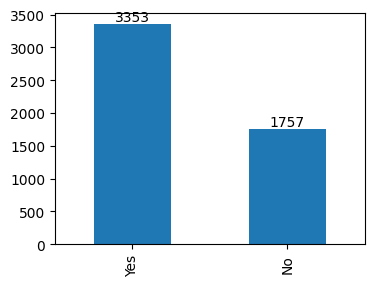

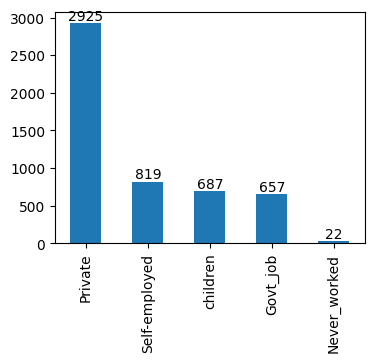

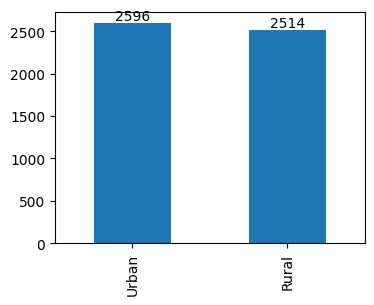

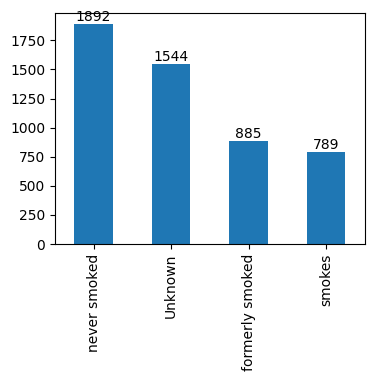

In [25]:
for col in Cat_columns:
    plt.figure(figsize=(4, 3))
    ax = df[col].value_counts().plot(kind='bar')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

In [28]:
# Check for missing values
df.drop(['id'], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [29]:
# Data Preprocessing
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

x = df.drop(['stroke'], axis=1)
y = df['stroke']

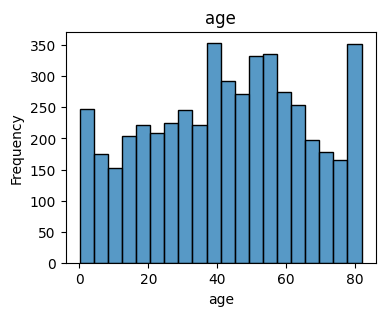

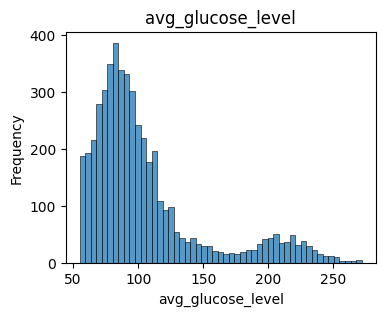

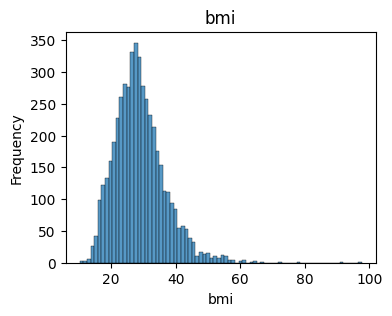

In [14]:
# Numerical columns
Num_columns = df.select_dtypes(include=np.number).columns
Num_cols = ['age', 'avg_glucose_level', 'bmi']
for col in Num_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=False)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

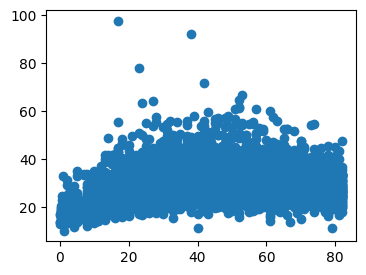

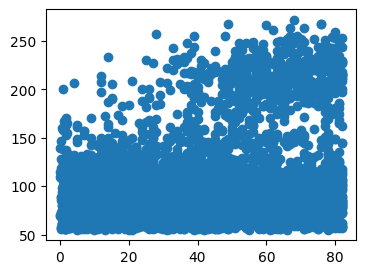

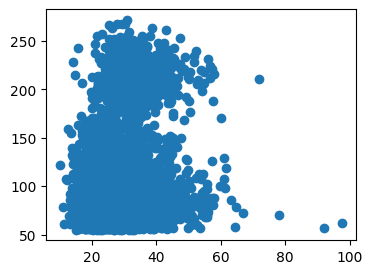

In [8]:
plt.figure(figsize=(4, 3))
plt.scatter(df.age, df.bmi)
plt.show()

plt.figure(figsize=(4, 3))
plt.scatter(x=df.age, y=df.avg_glucose_level)
plt.show()

plt.figure(figsize=(4, 3))
plt.scatter(x=df.bmi, y=df.avg_glucose_level)
plt.show()

<Axes: >

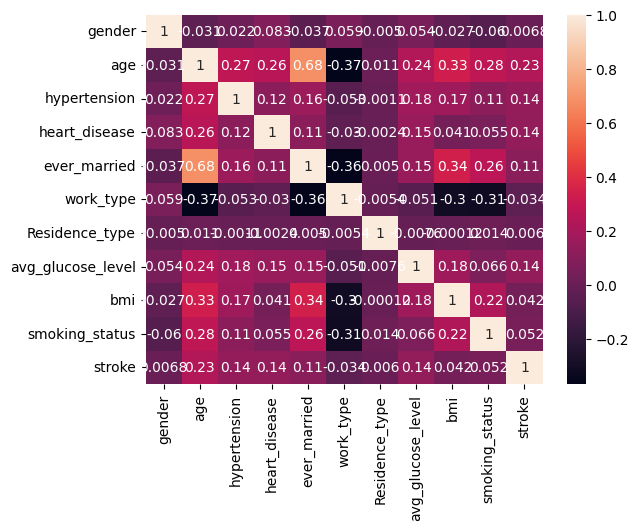

In [9]:
cor_matrix = df[Num_columns].corr()
sns.heatmap(cor_matrix, annot=True)

In [44]:
# Stratified sampling and feature scaling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=5)

In [48]:
# Define classifiers and their hyperparameter spaces
classifiers = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10, 100]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {}
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}

Decision Tree Train Accuracy: 0.9700
Decision Tree Test Accuracy: 0.9470


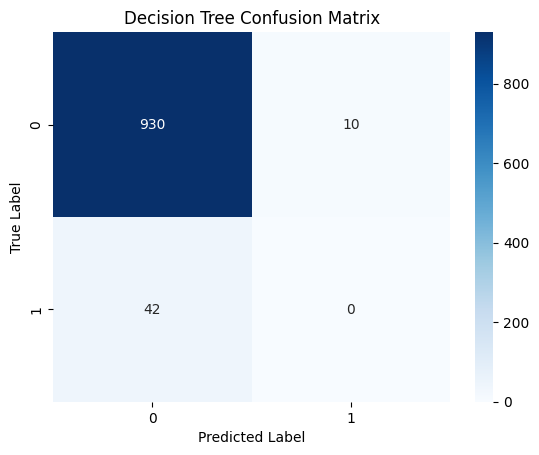

Random Forest Train Accuracy: 0.9638
Random Forest Test Accuracy: 0.9562


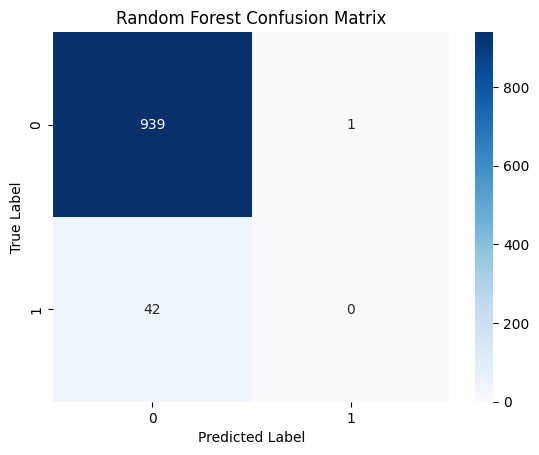

SVM Train Accuracy: 0.9575
SVM Test Accuracy: 0.9572


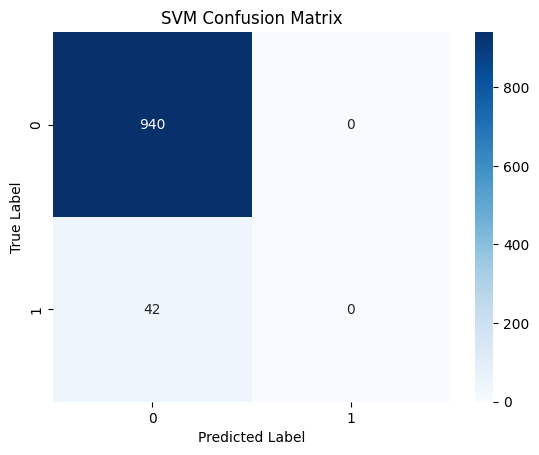

Logistic Regression Train Accuracy: 0.9575
Logistic Regression Test Accuracy: 0.9572


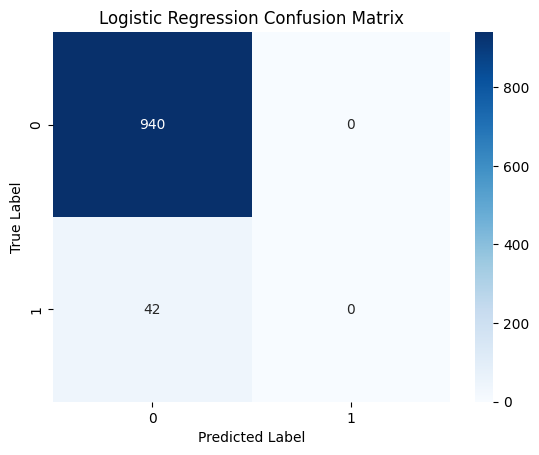

KNN Train Accuracy: 0.9585
KNN Test Accuracy: 0.9552


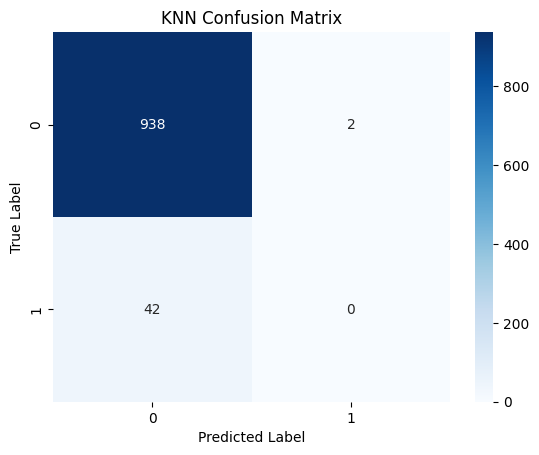

Naive Bayes Train Accuracy: 0.8737
Naive Bayes Test Accuracy: 0.8849


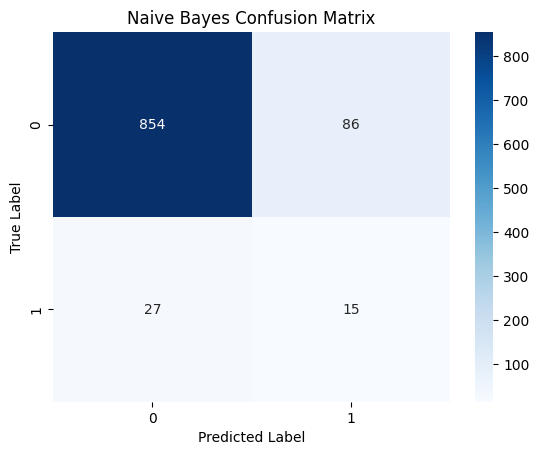

In [ ]:
# Train and evaluate the models
for clf_name, clf_params in classifiers.items():
    model = clf_params['model']
    param_grid = clf_params['param_grid']

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=skf, return_train_score=False)
        grid_search.fit(x_train_scaled, y_train)
        model = grid_search.best_estimator_
    else:
        model.fit(x_train_scaled, y_train)

    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"{clf_name} Train Accuracy: {train_acc:.4f}")
    print(f"{clf_name} Test Accuracy: {test_acc:.4f}")

    conf_matrix = confusion_matrix(y_test, y_pred_test)
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{clf_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
# Prediction for a new patient
new_patient_data = []
for col in df.columns[:-1]:  # Exclude the target variable 'stroke'
    if df[col].dtype == 'object':
        value = input(f"Enter the {col}: ")
        new_patient_data.append(label_encoder.transform([value])[0])
    else:
        value = float(input(f"Enter the {col}: "))
        new_patient_data.append(value)

# Scale the input data
scaler = StandardScaler()
new_patient_data_scaled = scaler.fit_transform([new_patient_data])

# Make predictions using the best performing model based on training set performance
best_model_name = max(classifiers, key=lambda x: accuracy_score(y_train, classifiers[x]['model'].predict(x_train_scaled)))
best_model = classifiers[best_model_name]['model']
prediction = best_model.predict(new_patient_data_scaled)

if prediction[0] == 1:
    print("The model predicts that the new patient is likely to have a stroke.")
else:
    print("The model predicts that the new patient is unlikely to have a stroke.")